In [1]:
import pandas as pd
import sys
import numpy

sys.path.append('../')
from utils import clustering_utils, dataframe_utils

In [2]:
# MIN-MAX
# microarray = pd.read_csv('../TGNE/embedding/test_nn3_leiden_label_df_round_1.csv')
# rna_seq = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

# Z-SCORE
microarray = pd.read_csv('../TGNE/embedding/testz_nn3_leiden_label_df_round_1.csv')
rna_seq = pd.read_csv('../TGNE/embedding/rnaz_seq_label_df_round_1.csv')

In [3]:
ttherm_df = pd.read_csv('./tt.csv')

ttherm_df

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue
0,TTHERM_01127520,6.662691,7.776168,27.401980,1.338125e-11,1.011772e-07,18.024832,6.994917
1,TTHERM_00056190,5.202193,6.263239,26.798823,1.710010e-11,1.011772e-07,17.901069,6.994917
2,TTHERM_00155590,-7.775511,7.559874,-25.317986,3.196561e-11,1.011772e-07,17.572169,6.994917
3,TTHERM_00261850,5.436875,9.935126,25.284801,3.242994e-11,1.011772e-07,17.564364,6.994917
4,TTHERM_00558440,5.832609,6.506094,25.275719,3.255830e-11,1.011772e-07,17.562224,6.994917
...,...,...,...,...,...,...,...,...
18805,TTHERM_00118750,-0.000507,9.107810,-0.000889,9.993062e-01,9.995187e-01,-3.030899,0.000209
18806,TTHERM_00691925,0.000396,6.037489,0.000775,9.993955e-01,9.995549e-01,-3.030900,0.000193
18807,TTHERM_01141638,0.000390,5.035715,0.000550,9.995712e-01,9.996580e-01,-3.030900,0.000149
18808,TTHERM_00317120,-0.000110,8.166408,-0.000506,9.996048e-01,9.996580e-01,-3.030900,0.000149


In [4]:
import numpy as np

def probability_from_bstat(b_stat):
    odds = np.exp(b_stat)
    
    probability = odds / (1 + odds)
    
    return probability

In [5]:
probability_from_bstat(1)

0.7310585786300049

In [6]:
probability_from_bstat(1.6)

0.8320183851339245

In [7]:
ttherm_df['diff_exp_prob'] = ttherm_df['B'].apply(probability_from_bstat)

In [8]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
4281,TTHERM_01018540,1.326388,15.056447,5.247592,0.000260,0.001142,4.281836,2.942501,0.986371
6355,TTHERM_00473020,0.933493,15.122860,3.947521,0.002216,0.006557,2.141232,2.183282,0.894847
8024,TTHERM_00321730,0.926411,6.007156,3.161546,0.008892,0.020840,0.766356,1.681112,0.682732
12802,TTHERM_00527180,0.259223,15.769035,1.509230,0.158989,0.233584,-1.922730,0.631556,0.127557
15033,TTHERM_00624720,0.147792,15.825690,0.888567,0.392964,0.491663,-2.622630,0.308333,0.067696
15075,TTHERM_00624730,0.150811,15.838373,0.877985,0.398439,0.497124,-2.631975,0.303535,0.067109
15997,TTHERM_00522600,0.115472,15.778603,0.643030,0.533180,0.626894,-2.813555,0.202806,0.056596
17632,TTHERM_01055600,0.044023,15.939062,0.263930,0.796639,0.849814,-2.993717,0.070676,0.047711
18045,TTHERM_00378890,-0.028959,15.910998,-0.173828,0.865111,0.901714,-3.014742,0.044931,0.046764


In [9]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
].to_csv('~/grls.csv')

In [10]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
[
'TTHERM_00378890',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00624720',
'TTHERM_00537380',
'TTHERM_01055600',
'TTHERM_00221120',
'TTHERM_00471040',
'TTHERM_00624730',
'TTHERM_01002870',
'TTHERM_00473020',
'TTHERM_01002860',
]
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
6355,TTHERM_00473020,0.933493,15.122860,3.947521,0.002216,0.006557,2.141232,2.183282,0.894847
6524,TTHERM_00471040,0.755107,15.359091,3.868636,0.002541,0.007325,2.004923,2.135209,0.881313
7149,TTHERM_00537380,0.861843,14.998235,3.553705,0.004417,0.011620,1.455992,1.934780,0.810919
7928,TTHERM_01002870,0.597344,15.620469,3.202836,0.008257,0.019588,0.839047,1.708001,0.698264
12400,TTHERM_00221120,0.316737,15.680445,1.622608,0.132528,0.201020,-1.767423,0.696761,0.145863
12802,TTHERM_00527180,0.259223,15.769035,1.509230,0.158989,0.233584,-1.922730,0.631556,0.127557
15033,TTHERM_00624720,0.147792,15.825690,0.888567,0.392964,0.491663,-2.622630,0.308333,0.067696
15075,TTHERM_00624730,0.150811,15.838373,0.877985,0.398439,0.497124,-2.631975,0.303535,0.067109
15997,TTHERM_00522600,0.115472,15.778603,0.643030,0.533180,0.626894,-2.813555,0.202806,0.056596
17209,TTHERM_01002860,0.062736,15.854399,0.363720,0.722856,0.790058,-2.960484,0.102341,0.049243


In [11]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120']
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
346,TTHERM_00046372,4.276693,8.729740,13.089574,4.006646e-08,0.000002,12.557788,5.663903,0.999996
4504,TTHERM_00038880,1.176623,15.284626,5.084140,3.359370e-04,0.001403,4.025408,2.853048,0.982457
6355,TTHERM_00473020,0.933493,15.122860,3.947521,2.215710e-03,0.006557,2.141232,2.183282,0.894847
6524,TTHERM_00471040,0.755107,15.359091,3.868636,2.540873e-03,0.007325,2.004923,2.135209,0.881313
7149,TTHERM_00537380,0.861843,14.998235,3.553705,4.417096e-03,0.011620,1.455992,1.934780,0.810919
7928,TTHERM_01002870,0.597344,15.620469,3.202836,8.257125e-03,0.019588,0.839047,1.708001,0.698264
12400,TTHERM_00221120,0.316737,15.680445,1.622608,1.325277e-01,0.201020,-1.767423,0.696761,0.145863
12802,TTHERM_00527180,0.259223,15.769035,1.509230,1.589890e-01,0.233584,-1.922730,0.631556,0.127557
15033,TTHERM_00624720,0.147792,15.825690,0.888567,3.929643e-01,0.491663,-2.622630,0.308333,0.067696
15075,TTHERM_00624730,0.150811,15.838373,0.877985,3.984391e-01,0.497124,-2.631975,0.303535,0.067109


In [12]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120'
]
    ))
].shape

(14, 9)

In [13]:
FC = 1.5
logFC = numpy.log2(FC)
q_value = 0.01
B = 1

ttherm_df_filtered = ttherm_df.loc[
    (ttherm_df['logFC'] > logFC)
    &
    (ttherm_df['adj.P.Val'] < q_value)
    &
    (ttherm_df['B'] > B)
].sort_values(by=('B'), ascending=False)

ttherm_df_filtered

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
0,TTHERM_01127520,6.662691,7.776168,27.401980,1.338125e-11,1.011772e-07,18.024832,6.994917,1.000000
1,TTHERM_00056190,5.202193,6.263239,26.798823,1.710010e-11,1.011772e-07,17.901069,6.994917,1.000000
3,TTHERM_00261850,5.436875,9.935126,25.284801,3.242994e-11,1.011772e-07,17.564364,6.994917,1.000000
4,TTHERM_00558440,5.832609,6.506094,25.275719,3.255830e-11,1.011772e-07,17.562224,6.994917,1.000000
5,TTHERM_00196410,5.824968,7.576139,25.020117,3.640732e-11,1.011772e-07,17.501381,6.994917,1.000000
...,...,...,...,...,...,...,...,...,...
6932,TTHERM_00137730,0.830940,9.148884,3.661396,3.652221e-03,9.908882e-03,1.644437,2.003975,0.838138
6934,TTHERM_00735370,0.902300,10.088468,3.660032,3.661000e-03,9.929836e-03,1.642055,2.003058,0.837814
6936,TTHERM_00437590,0.933353,10.129624,3.658763,3.669193e-03,9.949188e-03,1.639838,2.002212,0.837513
6937,TTHERM_01055460,0.845773,7.040025,3.658476,3.671048e-03,9.952782e-03,1.639336,2.002055,0.837445


In [14]:
np.min(ttherm_df_filtered['B'])

1.63655776230789

In [15]:
import matplotlib.pyplot as plt

import bokeh
import bokeh.plotting
from bokeh.models import Range1d

# Define thresholds
fold_change_threshold = logFC  # Threshold for log2 fold change
pvalue_threshold = -np.log10(q_value)  # Threshold for p-value
b_value_threshold = B

colors = np.where(
    (ttherm_df['logFC'] > fold_change_threshold)
    & 
    (ttherm_df['negLogPValue'] > pvalue_threshold)
    &
    (ttherm_df['B'] > b_value_threshold), 
    'red', 
    'black'
)

fig = bokeh.plotting.figure(width=600, 
                            height=400, 
                            title='Differential upregulation after stimulated secretion',
                            x_axis_label='log2 fold-change: log2(∆wt/∆mut)',
                            y_axis_label='-log10(q-value)')

fig.circle(ttherm_df['logFC'], 
           ttherm_df['negLogPValue'], 
           alpha=0.1,
           line_alpha=0.7,
           size=4,
           color=colors
          )

fig.line([fold_change_threshold, fold_change_threshold], [-0.5, 8], color='blue', line_width=2, line_dash='dashed')
fig.line([-11, 11], [pvalue_threshold, pvalue_threshold], color='blue', line_width=2, line_dash='dashed')

    
fig.x_range = Range1d(-10, 10)
fig.y_range = Range1d(-0.3, 7.3)


bokeh.plotting.show(fig)



# # Create a new figure
# plt.figure(figsize=(7, 5))

# # Scatter plot: points with different colors for significance
# # Color significant points differently
# colors = np.where(
#     (ttherm_df['logFC'] > fold_change_threshold)
#     & 
#     (ttherm_df['negLogPValue'] > pvalue_threshold)
#     & 
#     (ttherm_df['B'] > B), 
#     'red', 
#     'black'
# )

# plt.scatter(
#     ttherm_df['logFC'], 
#     ttherm_df['negLogPValue'], 
#     c=colors, 
#     alpha=0.1,
#     s=10
# )

# # Add labels and title
# plt.title('Volcano Plot')
# plt.xlabel('Log2 Fold Change')
# plt.ylabel('-Log10(p-value)')

# # Add horizontal and vertical threshold lines
# plt.axhline(y=pvalue_threshold, color='blue', linestyle='--')
# plt.axvline(x=fold_change_threshold, color='blue', linestyle='--')

# # # Annotate significant genes
# # for i, row in ttherm_df.iterrows():
# #     if (abs(row['log2FoldChange']) >= fold_change_threshold) and (row['pvalue'] <= pvalue_threshold):
# #         plt.text(
# #             row['log2FoldChange'], 
# #             row['-log10(pvalue)'], 
# #             row['Gene'], 
# #             fontsize=8,
# #             ha='right'
# #         )

# # Save the figure as an SVG file
# plt.savefig('regranulation_volcano_plot.svg', format='svg')

# # Show the plot
# plt.show()

In [16]:
np.min(ttherm_df_filtered['logFC'])

0.670577975102441

In [17]:
2**0.67

1.5910729675098374

In [18]:
ttherm_df_filtered.to_csv(f'./de_regranulation_FC_{FC}_q_value_{q_value}_B_{B}.csv', index=False)

In [19]:
muco_exp_list = [
'TTHERM_00052190',
'TTHERM_00011710',
'TTHERM_00321680',
'TTHERM_00445920',
'TTHERM_00410180',
'TTHERM_00410210',
'TTHERM_00313130',
'TTHERM_00059370',
'TTHERM_00283800',
'TTHERM_00241790',
'TTHERM_00318900',
'TTHERM_00852790',
'TTHERM_00467390',
'TTHERM_01332070',
'TTHERM_00497590',
'TTHERM_00013410',
'TTHERM_00527180',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00378890',
'TTHERM_00522600',
'TTHERM_01055600',
'TTHERM_00558350',
'TTHERM_00221120',
'TTHERM_00572100',
'TTHERM_00420770',
'TTHERM_00566910',
'TTHERM_00658810',
'TTHERM_00047330',
'TTHERM_000193469',
'TTHERM_000486279',
'TTHERM_00141040',
'TTHERM_00227750',
'TTHERM_00317390',
'TTHERM_00670750',
'TTHERM_01122800',
'TTHERM_01213910',
'TTHERM_00886960',
'TTHERM_01287970',
'TTHERM_00498010',
]

In [20]:
len(muco_exp_list)

40

In [21]:
de_regranulation_df = pd.read_csv(f'./de_regranulation_FC_{FC}_q_value_{q_value}_B_{B}.csv')

In [22]:
de_muco = list(set(list(de_regranulation_df['Unnamed: 0'].values)).intersection(set(muco_exp_list)))
de = list(set(list(de_regranulation_df['Unnamed: 0'].values)) - set(muco_exp_list))
muco = list(set(muco_exp_list) - set(list(de_regranulation_df['Unnamed: 0'].values)))

In [23]:
de_regranulation_annot_df = pd.DataFrame({
    'TTHERM_ID': de_muco + de + muco,
    'mucocysts': ['DE,EV' for _ in range(len(de_muco))] + ['DE' for _ in range(len(de))] + ['EV' for _ in range(len(muco))],
    })

In [24]:
de_regranulation_annot_df

,TTHERM_ID,mucocysts
0,TTHERM_00572100,"DE,EV"
1,TTHERM_00410180,"DE,EV"
2,TTHERM_00052190,"DE,EV"
3,TTHERM_00558350,"DE,EV"
4,TTHERM_00445920,"DE,EV"
...,...,...
3224,TTHERM_00527180,EV
3225,TTHERM_01055600,EV
3226,TTHERM_000486279,EV
3227,TTHERM_00624720,EV


In [25]:
modified_annotation = pd.read_csv('../active_files/complete_annotation.csv')
modified_annotation_no_muco = modified_annotation.copy()

In [26]:
modified_annotation.head()

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description
0,TTHERM_00840110,5911.EAS05042,0.0,1278.5,"2E5M0@1|root,2SCE9@2759|Eukaryota,3ZEBN@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,-,hypothetical protein,MISSNQTADQENKVENKVANAEHVNQQSYDSIPQSLSPAVIAQIMD...,Unnamed,-,-
1,TTHERM_01082930,31033.ENSTRUP00000031008,1.9999999999999997e-28,94.2,"COG5078@1|root,KOG0418@2759|Eukaryota,38KYZ@33...",33208|Metazoa,O,Belongs to the ubiquitin-conjugating enzyme fa...,UBE2K,"GO:0000209,GO:0003674,GO:0003824,GO:0004842,GO...",...,"ko00000,ko00001,ko01000,ko04121",-,-,-,"UBA,UQ_con",ubiquitin-conjugating enzyme E2,MHKNILIILFQIFCCQIYTTIYTFYYFMANIVFIIHNVKLDLFSCF...,Unnamed,"IPR000608,IPR016135,IPR023313,IPR050113","Ubiquitin-conjugating enzyme E2,Ubiquitin-conj..."
2,TTHERM_01081610,5911.EAR82090,0.0,2110.7,"2A5FX@1|root,2RY9I@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,-,PRESAN,transmembrane protein putative,MSSQSPAKLNNQNCAAANQYYNDLESCVQGYCIKQQSGSGARGCFP...,Unnamed,-,-
3,TTHERM_00059210,5911.EAR87408,3.2999999999999998e-298,983.9,"COG0575@1|root,KOG1440@2759|Eukaryota,3ZAR9@58...",5878|Ciliophora,I,Cytidylyltransferase family,-,-,...,"ko00000,ko00001,ko00002,ko01000",-,-,-,CTP_transf_1,phosphatidate cytidylyltransferase,MSQVTNRSQKKSHQKRDEKSEEDSSDEKTDDFSEEELDKLQEAQKK...,Unnamed,"IPR000374,IPR016720","Phosphatidate cytidylyltransferase,Phosphatida..."
4,TTHERM_00535200,5911.EAS03184,0.0,2448.3,"2E77S@1|root,2SDUU@2759|Eukaryota",5911.EAS03184|-,S,Src homology 3 domains,-,-,...,-,-,-,-,-,beta-Pak interactive eXchange factor Src-like ...,MFTKSNSRSALAGLNSIVNSQNDSLTSRAQHQNYAKKDLTISNSTS...,Unnamed,"IPR001452,IPR036028,IPR051569","SH3 domain,SH3-like domain superfamily,SH3 and..."


In [27]:
modified_annotation = modified_annotation.merge(de_regranulation_annot_df, on='TTHERM_ID', how='outer')
modified_annotation

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description,mucocysts
0,TTHERM_00840110,5911.EAS05042,0.0,1278.5,"2E5M0@1|root,2SCE9@2759|Eukaryota,3ZEBN@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,hypothetical protein,MISSNQTADQENKVENKVANAEHVNQQSYDSIPQSLSPAVIAQIMD...,Unnamed,-,-,NaN
1,TTHERM_01082930,31033.ENSTRUP00000031008,1.9999999999999997e-28,94.2,"COG5078@1|root,KOG0418@2759|Eukaryota,38KYZ@33...",33208|Metazoa,O,Belongs to the ubiquitin-conjugating enzyme fa...,UBE2K,"GO:0000209,GO:0003674,GO:0003824,GO:0004842,GO...",...,-,-,-,"UBA,UQ_con",ubiquitin-conjugating enzyme E2,MHKNILIILFQIFCCQIYTTIYTFYYFMANIVFIIHNVKLDLFSCF...,Unnamed,"IPR000608,IPR016135,IPR023313,IPR050113","Ubiquitin-conjugating enzyme E2,Ubiquitin-conj...",NaN
2,TTHERM_01081610,5911.EAR82090,0.0,2110.7,"2A5FX@1|root,2RY9I@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,PRESAN,transmembrane protein putative,MSSQSPAKLNNQNCAAANQYYNDLESCVQGYCIKQQSGSGARGCFP...,Unnamed,-,-,NaN
3,TTHERM_00059210,5911.EAR87408,3.2999999999999998e-298,983.9,"COG0575@1|root,KOG1440@2759|Eukaryota,3ZAR9@58...",5878|Ciliophora,I,Cytidylyltransferase family,-,-,...,-,-,-,CTP_transf_1,phosphatidate cytidylyltransferase,MSQVTNRSQKKSHQKRDEKSEEDSSDEKTDDFSEEELDKLQEAQKK...,Unnamed,"IPR000374,IPR016720","Phosphatidate cytidylyltransferase,Phosphatida...",NaN
4,TTHERM_00535200,5911.EAS03184,0.0,2448.3,"2E77S@1|root,2SDUU@2759|Eukaryota",5911.EAS03184|-,S,Src homology 3 domains,-,-,...,-,-,-,-,beta-Pak interactive eXchange factor Src-like ...,MFTKSNSRSALAGLNSIVNSQNDSLTSRAQHQNYAKKDLTISNSTS...,Unnamed,"IPR001452,IPR036028,IPR051569","SH3 domain,SH3-like domain superfamily,SH3 and...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26684,TTHERM_00989420,-,-,-,-,-,-,-,-,-,...,-,-,-,-,Nucleotide-binding oligomerization domain-cont...,MIPPSKRIDFGRNIVPTQFLPKDGYKARNLKTEAAQQLTENKRYQT...,Unnamed,-,-,NaN
26685,TTHERM_01245650,-,-,-,-,-,-,-,-,-,...,-,-,-,-,transmembrane protein putative,MLFNQQFLIFSQIINQSCSNLQMTSPKKKKGQTLKNSYKKTGLRTS...,Unnamed,-,-,NaN
26686,TTHERM_00126960,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,MDQYTQLENLDFAYFQNTISSQQNIKNLSIVFLFLSFQKIICLGMY...,Unnamed,-,-,NaN
26687,TTHERM_000486279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EV


In [28]:
modified_annotation.isna().sum()

TTHERM_ID                   0
seed_ortholog               2
evalue                      2
score                       2
eggNOG_OGs                  2
max_annot_lvl               2
COG_category                2
Description                 2
Preferred_name              2
GOs                         2
EC                          2
KEGG_ko                     2
KEGG_Pathway                2
KEGG_Module                 2
KEGG_Reaction               2
KEGG_rclass                 2
BRITE                       2
KEGG_TC                     2
CAZy                        2
BiGG_Reaction               2
PFAMs                       2
TGD2021_description         2
peptide                     2
common_name                 2
InterPro                    2
InterPro_description        2
mucocysts               23460
dtype: int64

In [29]:
modified_annotation = modified_annotation.fillna('-')

In [30]:
modified_annotation.isna().sum()

TTHERM_ID               0
seed_ortholog           0
evalue                  0
score                   0
eggNOG_OGs              0
max_annot_lvl           0
COG_category            0
Description             0
Preferred_name          0
GOs                     0
EC                      0
KEGG_ko                 0
KEGG_Pathway            0
KEGG_Module             0
KEGG_Reaction           0
KEGG_rclass             0
BRITE                   0
KEGG_TC                 0
CAZy                    0
BiGG_Reaction           0
PFAMs                   0
TGD2021_description     0
peptide                 0
common_name             0
InterPro                0
InterPro_description    0
mucocysts               0
dtype: int64

In [31]:
modified_annotation.to_csv('../active_files/complete_annotation.csv', index=False)

In [32]:
microarray_enrich = clustering_utils.compute_enrichment(microarray)

rna_seq_enrich = clustering_utils.compute_enrichment(rna_seq)

In [33]:
modified_annotation_no_muco.to_csv('../active_files/complete_annotation.csv', index=False)

In [34]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

rna_de = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])
microarray_de = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])

len(rna_ev), len(microarray_ev), len(rna_de), len(microarray_de)

(5, 5, 68, 89)

In [35]:
len(rna_ev.intersection(rna_de))

3

In [36]:
rna_ev

{617, 632, 634, 636, 679}

In [37]:
print(*['m'+str(m).zfill(3) for m in rna_ev], sep=', ')

m679, m617, m632, m634, m636


In [38]:
print(*['m'+str(m).zfill(3) for m in microarray_ev], sep=', ')

m424, m169, m171, m172, m174


In [39]:
(rna_ev.intersection(rna_de))

{632, 634, 679}

In [40]:
print(*['m'+str(m).zfill(3) for m in rna_de], sep=', ')

m512, m638, m401, m665, m540, m416, m545, m547, m550, m679, m042, m554, m559, m432, m562, m051, m567, m441, m057, m058, m443, m061, m062, m445, m447, m448, m066, m194, m450, m581, m584, m459, m460, m461, m462, m463, m464, m465, m466, m467, m468, m588, m470, m720, m088, m472, m721, m475, m725, m726, m478, m606, m728, m730, m098, m354, m483, m101, m103, m107, m627, m634, m247, m632, m506, m508, m510, m639


In [41]:
len(microarray_ev.intersection(microarray_de))

3

In [42]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape

((73, 7), (94, 7))

In [43]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])].shape

((5, 7), (5, 7))

In [44]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,7.0,DE,differentially expressed in mucocyst regranula...,3.638858,8.395194e-07,18.0,41.0
0,9.0,DE,differentially expressed in mucocyst regranula...,2.417482,3.530270e-02,7.0,24.0
0,12.0,DE,differentially expressed in mucocyst regranula...,2.572296,1.027093e-02,9.0,29.0
0,13.0,DE,differentially expressed in mucocyst regranula...,3.946909,1.607627e-04,10.0,21.0
0,14.0,DE,differentially expressed in mucocyst regranula...,3.978484,2.670933e-05,12.0,25.0
...,...,...,...,...,...,...,...
0,574.0,DE,differentially expressed in mucocyst regranula...,2.131331,3.295016e-02,9.0,35.0
0,584.0,DE,differentially expressed in mucocyst regranula...,2.021588,3.342314e-02,10.0,41.0
0,585.0,DE,differentially expressed in mucocyst regranula...,2.368146,1.208182e-03,16.0,56.0
0,592.0,DE,differentially expressed in mucocyst regranula...,1.826282,3.176834e-02,13.0,59.0


In [45]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,42.0,DE,differentially expressed in mucocyst regranula...,1.927560,0.044485,10.0,43.0
0,51.0,DE,differentially expressed in mucocyst regranula...,2.016124,0.045026,9.0,37.0
0,57.0,DE,differentially expressed in mucocyst regranula...,3.108191,0.002679,9.0,24.0
0,58.0,DE,differentially expressed in mucocyst regranula...,2.693766,0.001075,13.0,40.0
0,61.0,DE,differentially expressed in mucocyst regranula...,2.313072,0.006664,12.0,43.0
...,...,...,...,...,...,...,...
0,721.0,DE,differentially expressed in mucocyst regranula...,3.014003,0.006109,8.0,22.0
0,725.0,DE,differentially expressed in mucocyst regranula...,3.626223,0.000018,14.0,32.0
0,726.0,DE,differentially expressed in mucocyst regranula...,2.331143,0.019307,9.0,32.0
0,728.0,DE,differentially expressed in mucocyst regranula...,2.302364,0.002365,15.0,54.0


In [46]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,169.0,EV,experimentally validated mucocyst-associated gene,667.225000,1.561464e-09,4.0,4.0
1,171.0,EV,experimentally validated mucocyst-associated gene,142.976786,2.598162e-39,21.0,98.0
1,172.0,EV,experimentally validated mucocyst-associated gene,48.821341,1.679830e-03,3.0,41.0
1,174.0,EV,experimentally validated mucocyst-associated gene,51.325000,3.751447e-02,2.0,26.0
0,424.0,EV,experimentally validated mucocyst-associated gene,46.015517,4.201382e-02,2.0,29.0


In [47]:
print(','.join(['m'+str(int(m)).zfill(3) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m169,m171,m172,m174,m424


In [48]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,617.0,EV,experimentally validated mucocyst-associated gene,47.658929,4.051412e-02,2.0,28.0
1,632.0,EV,experimentally validated mucocyst-associated gene,44.481667,4.351344e-02,2.0,30.0
1,634.0,EV,experimentally validated mucocyst-associated gene,117.745588,1.352678e-09,6.0,34.0
0,636.0,EV,experimentally validated mucocyst-associated gene,129.738194,1.211057e-11,7.0,36.0
1,679.0,EV,experimentally validated mucocyst-associated gene,75.821023,5.176861e-07,5.0,44.0


In [49]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
1810,TTHERM_01302830,679
1811,TTHERM_01277506,679
1812,TTHERM_01213910,679
1813,TTHERM_01106040,679
1814,TTHERM_00938950,679
...,...,...
3793,TTHERM_00133640,617
3794,TTHERM_00129820,617
3795,TTHERM_00113000,617
3796,TTHERM_00077760,617


In [50]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
6772,TTHERM_01164066,424
6773,TTHERM_01107300,424
6774,TTHERM_00938880,424
6775,TTHERM_00894400,424
6776,TTHERM_00840140,424
...,...,...
14935,TTHERM_00011710,171
14963,TTHERM_01055600,169
14964,TTHERM_00624730,169
14965,TTHERM_00522600,169


In [51]:
print(','.join(['m'+str(int(m)).zfill(3) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m617,m632,m634,m636,m679


In [52]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
1810,TTHERM_01302830,679
1811,TTHERM_01277506,679
1812,TTHERM_01213910,679
1813,TTHERM_01106040,679
1814,TTHERM_00938950,679
...,...,...
3793,TTHERM_00133640,617
3794,TTHERM_00129820,617
3795,TTHERM_00113000,617
3796,TTHERM_00077760,617


In [53]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./rna_seq_ev_enriched_module_genes.csv', index=False)

In [54]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values

array([617., 632., 634., 636., 679.])

In [55]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,617.0,EV,experimentally validated mucocyst-associated gene,47.658929,4.051412e-02,2.0,28.0
1,632.0,EV,experimentally validated mucocyst-associated gene,44.481667,4.351344e-02,2.0,30.0
1,634.0,EV,experimentally validated mucocyst-associated gene,117.745588,1.352678e-09,6.0,34.0
0,636.0,EV,experimentally validated mucocyst-associated gene,129.738194,1.211057e-11,7.0,36.0
1,679.0,EV,experimentally validated mucocyst-associated gene,75.821023,5.176861e-07,5.0,44.0


In [56]:
[int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]

[617, 632, 634, 636, 679]

In [57]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./microarray_ev_enriched_module_genes.csv', index=False)

In [58]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

In [59]:
'select * from rna_seq_enrich where info LIKE "%ribo%"'

'select * from rna_seq_enrich where info LIKE "%ribo%"'

In [60]:
dataframe_utils.sql_query_df({'rna_seq_enrich': rna_seq_enrich}, 'select * from rna_seq_enrich where info LIKE "%ribosom%"').sort_values(by='module', ascending=False)

,module,term,info,fold_change,bonferroni,term_count,module_size
51,612.0,J,"Translation, ribosomal structure and biogenesis",9.835274,6.960593e-03,5.0,32.0
50,492.0,ko:K04373,ribosomal protein S6 kinase alpha-1/2/3/6,55.085655,1.374761e-06,6.0,51.0
49,425.0,J,"Translation, ribosomal structure and biogenesis",13.769384,4.807845e-05,7.0,32.0
48,279.0,ko:K04373,ribosomal protein S6 kinase alpha-1/2/3/6,29.264254,2.822320e-02,3.0,48.0
47,250.0,GO:0043232,Intracellular non-membrane-bounded organelle: ...,21.742566,4.667892e-08,10.0,25.0
46,250.0,GO:0043229,Intracellular organelle: Organized structure o...,8.130693,2.393507e-04,10.0,25.0
45,250.0,GO:0043228,Non-membrane-bounded organelle: Organized stru...,21.610526,4.926892e-08,10.0,25.0
44,250.0,GO:0043226,Organelle: Organized structure of distinctive ...,7.960925,2.860001e-04,10.0,25.0
43,250.0,GO:0006996,Organelle organization: A process that is carr...,17.661838,3.207070e-06,9.0,25.0
42,245.0,J,"Translation, ribosomal structure and biogenesis",10.746836,2.673738e-04,7.0,41.0


In [61]:
print(', '.join([f'm{str(int(mod)).zfill(3)}' for mod in (dataframe_utils.sql_query_df({'rna_seq_enrich': rna_seq_enrich}, 'select distinct(module) from rna_seq_enrich where info LIKE "%ribosom%"').sort_values(by='module', ascending=False)['module'].values)]))

m612, m492, m425, m279, m250, m245, m239, m220, m218, m216, m202, m154, m099, m097, m096, m090, m084, m074


In [62]:
rna_ev

{617, 632, 634, 636, 679}

In [63]:
muco_exp = set(muco_exp_list)

In [64]:
# ttherm_df_filtered = ttherm_df_filtered.loc[
#     (ttherm_df_filtered['diff_exp_prob'] > 0.9)
# ]
# ttherm_df_filtered

In [65]:
print(','.join(list(ttherm_df_filtered['Unnamed: 0'].values)))

TTHERM_01127520,TTHERM_00056190,TTHERM_00261850,TTHERM_00558440,TTHERM_00196410,TTHERM_00516395,TTHERM_01338520,TTHERM_00188500,TTHERM_00822150,TTHERM_00481170,TTHERM_01014580,TTHERM_01002630,TTHERM_00239350,TTHERM_01043140,TTHERM_01161080,TTHERM_00480150,TTHERM_00285550,TTHERM_00666210,TTHERM_00227130,TTHERM_00516330,TTHERM_00989430,TTHERM_00845880,TTHERM_00011660,TTHERM_00532720,TTHERM_00600240,TTHERM_01080440,TTHERM_00402020,TTHERM_01084400,TTHERM_00999152,TTHERM_00730330,TTHERM_01143870,TTHERM_00137740,TTHERM_00290740,TTHERM_00842410,TTHERM_00040350,TTHERM_00713420,TTHERM_00194210,TTHERM_00437690,TTHERM_00047020,TTHERM_00256990,TTHERM_00361750,TTHERM_00339900,TTHERM_01043130,TTHERM_00301830,TTHERM_00522740,TTHERM_00462890,TTHERM_01085670,TTHERM_00338350,TTHERM_00348960,TTHERM_00299979,TTHERM_00193820,TTHERM_00815160,TTHERM_01349994,TTHERM_00317430,TTHERM_00545770,TTHERM_00338490,TTHERM_00133760,TTHERM_01097960,TTHERM_01132940,TTHERM_00624120,TTHERM_00344200,TTHERM_00320460,TTHERM_0

In [66]:
# len(inter)

In [67]:
# print(','.join(inter))

In [68]:
# import requests
# from bs4 import BeautifulSoup

# def extract_descriptions_from_html(url):
#     try:
#         # Get the HTML content of the web page
#         response = requests.get(url)
#         response.raise_for_status()  # Check if the request was successful
#         html_content = response.content

#         # Parse the HTML content using BeautifulSoup
#         soup = BeautifulSoup(html_content, 'html.parser')

#         # Find the specific table with class 'main'
#         table = soup.find('table', class_='main')
#         if table:
#             # Find all rows in the table, skipping the header row
#             rows = table.find_all('tr')[1:]  # Skip the header row
#             descriptions = []

#             for row in rows:
#                 # Find all cells in the row
#                 cells = row.find_all('td')
#                 if len(cells) >= 4:
#                     description_text = cells[3].get_text(strip=True)
#                     descriptions.append(description_text)
            
#             if descriptions:
#                 for idx, description in enumerate(descriptions, 1):
#                     print(f"Description {idx}: {description}")
#             else:
#                 print("No descriptions found.")
#         else:
#             print("Table not found in the HTML.")

#     except requests.exceptions.RequestException as e:
#         print(f"An error occurred while fetching the HTML content: {e}")

# for gene in inter:
#     url = f"https://tet.ciliate.org/search.php?gene_name={gene}"  # Replace with the actual URL
#     extract_descriptions_from_html(url)

In [69]:
import scipy.stats as stats

# Total number of genes in the entire dataset
N = 20000

# Total number of specific genes you are interested in
K = 50

# Number of genes randomly selected
n = 5000

# Number of specific genes found in the selected set
k = 50

# Hypergeometric test
p_value = stats.hypergeom.sf(k-1, N, K, n)

print(f"The p-value is: {p_value}")

The p-value is: 6.559457458892222e-31


In [70]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 78
b = 1300
c = 16000
d = 16000

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

# One-tailed test (greater)
oddsratio, p_value_greater = stats.fisher_exact(table, alternative='greater')
print(f"One-tailed p-value (greater): {p_value_greater}")

# One-tailed test (less)
oddsratio, p_value_less = stats.fisher_exact(table, alternative='less')
print(f"One-tailed p-value (less): {p_value_less}")

Two-tailed p-value: 6.555352598579253e-277
One-tailed p-value (greater): 1.0
One-tailed p-value (less): 5.971977437724528e-277


In [71]:
from scipy.stats import chi2_contingency

# Create a 2x2 contingency table (example data)
# Replace with your actual observed counts
a = 78
b = 1300
c = 20000
d = 20000

observed = [[a, b], [c, d]]

# Perform Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 1046.7116189215628
P-value: 1.2620381730596847e-229
Degrees of Freedom: 1
Expected Frequencies:
[[  668.65203731   709.34796269]
 [19409.34796269 20590.65203731]]


In [72]:
# all_ttherm_df = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

In [73]:
# counts = []

# for i in range(10000):
#     counts.append(len(set(all_ttherm_df.sample(4000)['TTHERM_ID'].values).intersection(set(inter))))

In [74]:
# import matplotlib.pyplot as plt

# plt.hist(counts, 10)
# plt.show()

In [75]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 26
b = 1934
c = 13
d = 17027

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

Two-tailed p-value: 4.1016327983861445e-17


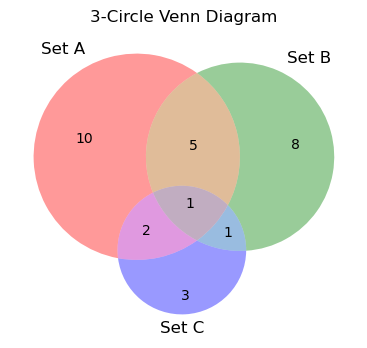

In [76]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(8, 4))
venn3(subsets=(10, 8, 5, 3, 2, 1, 1), set_labels=('Set A', 'Set B', 'Set C'))
plt.title("3-Circle Venn Diagram")
plt.show()

In [77]:
rna_seq_ev_enriched_df = rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

In [78]:
microarray_ev_enriched_df = microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

In [79]:
# import matplotlib.pyplot as plt
# from venn import venn

# # Define the sets
# sets = {
#     'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
#     'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
#     'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
# }

# # Create the Venn diagram
# v = venn(sets, legend_loc='upper center', ax=None, figsize=(10, 50))

# plt.savefig('muco_venn.svg', format='svg')

# plt.show()

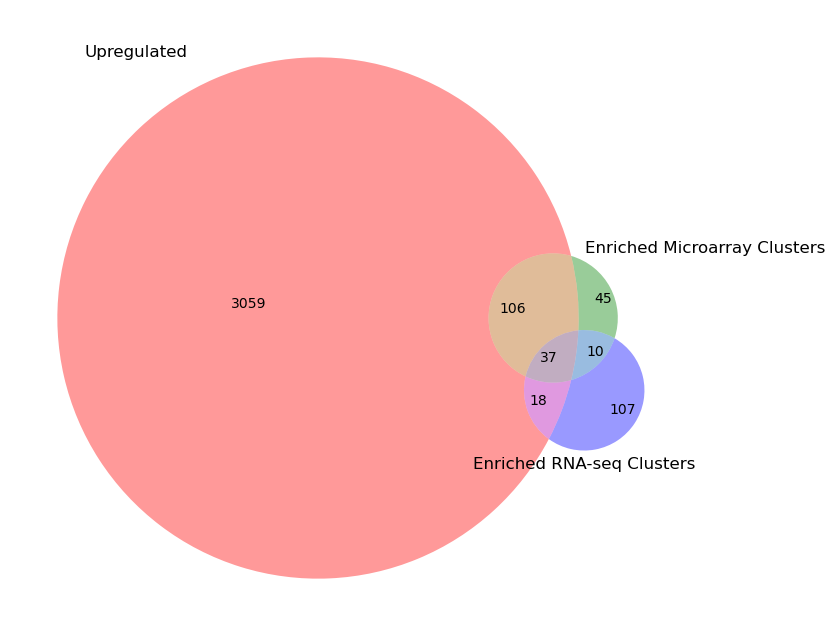

In [80]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the sets
sets = {
    'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
    'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
    'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
}

# Create the Venn diagram with specified figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here as needed

# Create a 3-set Venn diagram
v = venn3([sets['Upregulated'], sets['Enriched Microarray Clusters'], sets['Enriched RNA-seq Clusters']],
          ('Upregulated', 'Enriched Microarray Clusters', 'Enriched RNA-seq Clusters'),
          ax=ax)

# Save the plot in SVG format
plt.savefig('muco_venn.svg', format='svg')

# Display the plot
plt.show()

In [81]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))

In [82]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))
intersection_enriched = (set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_dem = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_der = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all

In [83]:
len(intersection_all), len(intersection_enriched), len(intersection_dem), len(intersection_der)

(37, 10, 106, 18)

In [84]:
print(f'{len(intersection_all)} gene intersection between all gene groups:')
print(*sorted(intersection_all), sep=', ')

print(f'{len(intersection_enriched)} gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:')
print(*sorted(intersection_enriched), sep=', ')

print(f'{len(intersection_dem)} gene intersection between the differentially expressed genes and the genes in the microarray enriched clusters:')
print(*sorted(intersection_dem), sep=', ')

print(f'{len(intersection_der)} gene intersection between the differentially expressed genes and the genes in the RNA-seq enriched clusters:')
print(*sorted(intersection_der), sep=', ')

37 gene intersection between all gene groups:
TTHERM_00011710, TTHERM_00038880, TTHERM_00047330, TTHERM_00052190, TTHERM_00059370, TTHERM_00145480, TTHERM_00187110, TTHERM_00193465, TTHERM_00218690, TTHERM_00227750, TTHERM_00241790, TTHERM_00283760, TTHERM_00312200, TTHERM_00313130, TTHERM_00314860, TTHERM_00317390, TTHERM_00321680, TTHERM_00321720, TTHERM_00390080, TTHERM_00420770, TTHERM_00445920, TTHERM_00486275, TTHERM_00522740, TTHERM_00585170, TTHERM_00592740, TTHERM_00630030, TTHERM_00649180, TTHERM_00670750, TTHERM_00685980, TTHERM_00713420, TTHERM_00773710, TTHERM_00787390, TTHERM_00938950, TTHERM_01049340, TTHERM_01106040, TTHERM_01213910, TTHERM_01321550
10 gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:
TTHERM_00221120, TTHERM_00378890, TTHERM_00522600, TTHERM_00527180, TTHERM_00537380, TTHERM_00624720, TTHERM_00624730, TTHERM_01002860, TTHERM_01002870, TTHERM_01055600
106 gene intersection between the differentiall

In [85]:
int_all_ev = intersection_all.intersection(set(muco_exp_list))
len(int_all_ev)

13

In [86]:
int_enr_ev = intersection_enriched.intersection(set(muco_exp_list))
len(int_enr_ev)

7

In [87]:
int_dem_ev = intersection_dem.intersection(set(muco_exp_list))
len(int_dem_ev)

12

In [114]:
int_der_ev = intersection_der.intersection(set(muco_exp_list))
len(int_der_ev)

2

In [115]:
agreement = int_all_ev.union(int_enr_ev).union(int_dem_ev).union(int_der_ev)
len(agreement)

34

In [116]:
lost = []
for t in muco_exp_list:
    if t not in agreement:
        lost.append(t)

In [117]:
', '.join(lost)

'TTHERM_00572100, TTHERM_000193469, TTHERM_000486279, TTHERM_00141040, TTHERM_00886960, TTHERM_00498010'

In [92]:
'TTHERM_00467390' in ttherm_df['Unnamed: 0'].values

True

In [93]:
int_all_ev

{'TTHERM_00011710',
 'TTHERM_00047330',
 'TTHERM_00052190',
 'TTHERM_00059370',
 'TTHERM_00227750',
 'TTHERM_00241790',
 'TTHERM_00313130',
 'TTHERM_00317390',
 'TTHERM_00321680',
 'TTHERM_00420770',
 'TTHERM_00445920',
 'TTHERM_00670750',
 'TTHERM_01213910'}

In [94]:
for t in int_all_ev:
    print(t ,)

TTHERM_00321680
TTHERM_00052190
TTHERM_00059370
TTHERM_00420770
TTHERM_00241790
TTHERM_00317390
TTHERM_01213910
TTHERM_00227750
TTHERM_00445920
TTHERM_00011710
TTHERM_00313130
TTHERM_00047330
TTHERM_00670750


In [95]:
', '.join(int_all_ev)

'TTHERM_00321680, TTHERM_00052190, TTHERM_00059370, TTHERM_00420770, TTHERM_00241790, TTHERM_00317390, TTHERM_01213910, TTHERM_00227750, TTHERM_00445920, TTHERM_00011710, TTHERM_00313130, TTHERM_00047330, TTHERM_00670750'

In [96]:
', '.join(int_enr_ev)

'TTHERM_00221120, TTHERM_00378890, TTHERM_00522600, TTHERM_00624730, TTHERM_00527180, TTHERM_01055600, TTHERM_00624720'

In [97]:
', '.join(int_dem_ev)

'TTHERM_00658810, TTHERM_00410180, TTHERM_01287970, TTHERM_00283800, TTHERM_00318900, TTHERM_00013410, TTHERM_00558350, TTHERM_00410210, TTHERM_00497590, TTHERM_00852790, TTHERM_01122800, TTHERM_01332070'

In [118]:
', '.join(int_der_ev)

'TTHERM_00566910, TTHERM_00467390'

In [98]:
print(*intersection_enriched.intersection(set([
'TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',
])), sep=', ')

TTHERM_00378890, TTHERM_00522600, TTHERM_00624730, TTHERM_00527180, TTHERM_01055600, TTHERM_00624720


In [99]:
len(intersection_enriched.intersection(set(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',])))

6

In [100]:
lx = 17.980
ly = 22.034

In [101]:
fx = 12.709
fy = 21.085

In [102]:
fx - lx 

-5.271000000000001

In [103]:
fy - ly 

-0.9489999999999981

In [104]:
108.552 - (-5.271) # x

113.82300000000001

In [105]:
113.166 - (-0.949) # y

114.115

In [106]:
len(intersection_all), len(muco_exp)

(37, 40)

In [107]:
len(intersection_all.intersection(muco_exp))

13

In [108]:
print(*intersection_all.intersection(muco_exp), sep=', ')

TTHERM_00321680, TTHERM_00052190, TTHERM_00059370, TTHERM_00420770, TTHERM_00241790, TTHERM_00317390, TTHERM_01213910, TTHERM_00227750, TTHERM_00445920, TTHERM_00011710, TTHERM_00313130, TTHERM_00047330, TTHERM_00670750


In [109]:
z = ['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370']

In [110]:
len(intersection_all.intersection(muco_exp).intersection(z))

12

In [111]:
print(*intersection_all.intersection(muco_exp).intersection(z), sep=', ')

TTHERM_00321680, TTHERM_00052190, TTHERM_00420770, TTHERM_00059370, TTHERM_00241790, TTHERM_00317390, TTHERM_01213910, TTHERM_00227750, TTHERM_00445920, TTHERM_00011710, TTHERM_00047330, TTHERM_00670750


In [112]:
len(set(['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370'
]).intersection(set(['TTHERM_00420770', 'TTHERM_00227750', 'TTHERM_00317390', 'TTHERM_01213910', 'TTHERM_00011710', 'TTHERM_00321680', 'TTHERM_00241790', 'TTHERM_00670750', 'TTHERM_00052190', 'TTHERM_00047330', 'TTHERM_00059370', 'TTHERM_00445920'
])))

12

In [113]:
len(set(
['TTHERM_00193465',
'TTHERM_00592740',
'TTHERM_01049340',
'TTHERM_01213910',
'TTHERM_00145480',
'TTHERM_00420770',
'TTHERM_00787390',
'TTHERM_00059370',
'TTHERM_01321550',
'TTHERM_00522740',
'TTHERM_00313130',
'TTHERM_00649180',
'TTHERM_00312200',
'TTHERM_00241790',
'TTHERM_00321720',
'TTHERM_00585170',
'TTHERM_00321680',
'TTHERM_00011710',
'TTHERM_00630030',
'TTHERM_00047330',
'TTHERM_00773710',
'TTHERM_00685980',
'TTHERM_00486275',
'TTHERM_00938950',
'TTHERM_00317390',
'TTHERM_00218690',
'TTHERM_00713420',
'TTHERM_00445920',
'TTHERM_00314860',
'TTHERM_00227750',
'TTHERM_00390080',
'TTHERM_00052190',
'TTHERM_00187110',
'TTHERM_00670750',
'TTHERM_01106040',
'TTHERM_00283760',]
).intersection(set(
['TTHERM_00187110',
'TTHERM_00193465',
'TTHERM_00314860',
'TTHERM_00630030',
'TTHERM_00938950',
'TTHERM_00522740',
'TTHERM_00787390',
'TTHERM_00649180',
'TTHERM_00445920',
'TTHERM_00317390',
'TTHERM_00713420',
'TTHERM_00486275',
'TTHERM_00313130',
'TTHERM_00241790',
'TTHERM_01106040',
'TTHERM_00283760',
'TTHERM_01321550',
'TTHERM_00685980',
'TTHERM_01213910',
'TTHERM_00390080',
'TTHERM_00312200',
'TTHERM_00670750',
'TTHERM_00227750',
'TTHERM_01049340',
'TTHERM_00218690',
'TTHERM_00321720',
'TTHERM_00592740',
'TTHERM_00059370',
'TTHERM_00052190',
'TTHERM_00047330',
'TTHERM_00321680',
'TTHERM_00585170',
'TTHERM_00420770',
'TTHERM_00011710',
'TTHERM_00145480',
'TTHERM_00773710',]
)))

36